## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the data

In [2]:
# Read files and print the inforamtion
train_features_df = pd.read_csv('Downloads/data/train_features.csv')
train_target_df = pd.read_csv('Downloads/data/train_salaries.csv')
test_features_df = pd.read_csv('Downloads/data/test_features.csv')

## Examine the data

In [3]:
train_features_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [4]:
test_features_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23,97


In [5]:
train_target_df.head(10)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


## See Count of Null Values and data types

In [6]:
train_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [7]:
test_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [8]:
train_target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


## Check for Duplicates

In [9]:
train_features_df.duplicated().sum()

0

In [10]:
test_features_df.duplicated().sum()

0

In [11]:
train_target_df.duplicated().sum()

0

## Identify numerical and categorical variables

In [12]:
train_features_df.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [13]:
categorical_cols = [col for col in train_features_df.columns if train_features_df[col].dtype == 'object' ]

In [14]:
numerical_cols = [col for col in train_features_df.columns if train_features_df[col].dtype != 'object' ]

In [15]:
print(numerical_cols)

['yearsExperience', 'milesFromMetropolis']


In [16]:
print(categorical_cols)

['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']


## Summarize numerical and categorical variables

In [17]:
train_features_df[numerical_cols].describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [18]:
train_features_df[categorical_cols].describe()

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362684878647,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


## Merge features and target into single df

In [19]:
# merge features and salaries on jobId into single df and delete original file to save memory
train_df = pd.merge(train_features_df, train_target_df, on='jobId')

In [20]:
del train_features_df
del train_target_df

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [22]:
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


## Visualize the Distribution of Features

In [23]:
def subplots_features_counts_distributions(data):
    '''
    return to distribution of continuse features or count of discreate features
    ignore specific features they do not have any meaning 
    '''
    
    ignored_cols = ['jobId', 'companyId']
    cols = [ col for col in data.columns if col not in ignored_cols]
    
    nrows= int(np.ceil(len(cols)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(12,15), constrained_layout=True)
    ax = ax.ravel()
    
    for i in range(len(cols)):

        if (data[cols[i]].dtypes == 'object') or (len(data[cols[i]].unique().tolist()) < 10):
            sns.countplot(y = data[cols[i]], ax=ax[i])
            ax[i].set_title(f'{cols[i]} Distribution');
            
        else:
            sns.histplot(x = data[cols[i]], ax=ax[i])
            ax[i].set_title(f'{cols[i]}')
            
    sns.boxplot(data[cols[i]], ax=ax[i+1])
    ax[i+1].set_title(f'{cols[i]}');

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


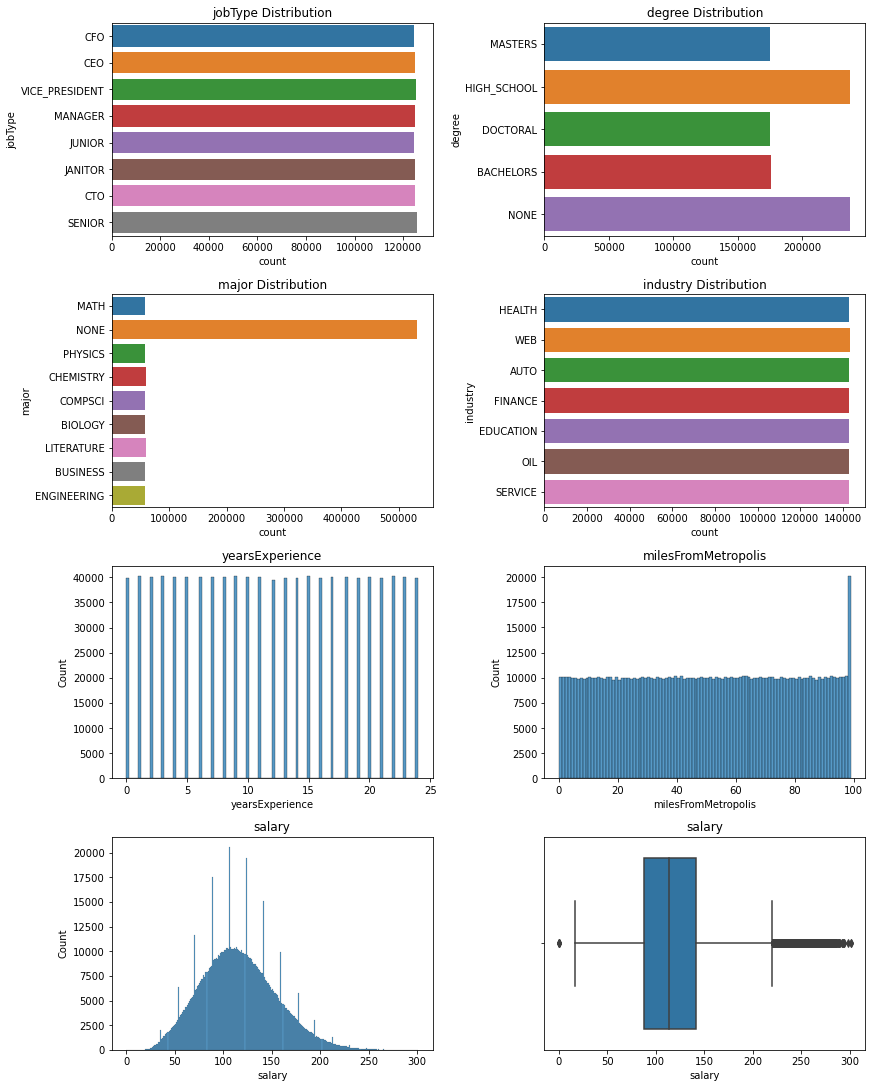

In [24]:
subplots_features_counts_distributions(train_df)

## Visualize target variable (salary)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


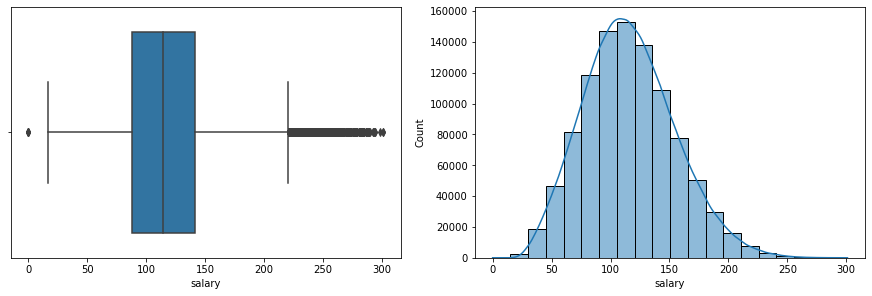

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4), constrained_layout=True)
ax = ax.ravel() 
sns.boxplot(train_df['salary'], ax=ax[0])
sns.histplot(train_df['salary'], kde=True, bins=20, ax=ax[1]);

We can see above the **job type and industry** have around the same distributions for each category as well as **years expereience** while **mile from metropolis and salary** have little bit values have higher than others. in other hand, **high school and none degrees** have the highest rates and that reflected for **major** distributin so, none major was the hightest rate

## Use IQR to identify potential outliers (Label "Salary")

In [26]:
stat = train_df['salary'].describe()
print(stat)
IQR = stat['75%'] - stat['25%']
lower = stat['25%'] - 1.5*IQR
upper = stat['75%'] + 1.5*IQR
print(f'The upper and lower bound for suspected outliers are {upper} and {lower}')

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64
The upper and lower bound for suspected outliers are 220.5 and 8.5


## Examine potential outliers

In [27]:
train_df[train_df['salary'] < 8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [28]:
train_df.loc[train_df['salary'] > 222.5, 'jobType'].value_counts()

CEO               2893
CFO               1308
CTO               1298
VICE_PRESIDENT     520
MANAGER            188
SENIOR              50
JUNIOR              16
Name: jobType, dtype: int64

In [29]:
train_df[(train_df['salary'] > 222.5) & (train_df['jobType'] == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
500739,JOB1362684908426,COMP40,JUNIOR,DOCTORAL,ENGINEERING,OIL,21,0,227
627534,JOB1362685035221,COMP5,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,29,230
645555,JOB1362685053242,COMP36,JUNIOR,DOCTORAL,BUSINESS,FINANCE,24,1,225


These entries with zero salary do not appear to be volunter position. We are confident that they are instances missing data and should be removed from the training set.

The high salary potential outliers all appear logically. Most of roles are C-level excutive roles and junior positions are in industries we well known for high salaries (oil, finance) we will keep them in the training data

In [30]:
# Remove data with zero salary
train_df = train_df[train_df['salary'] > 8.5]

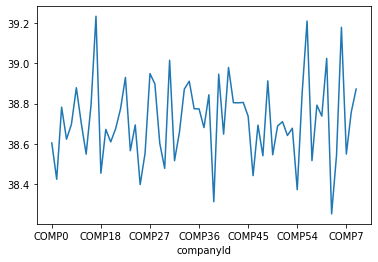

In [31]:
train_df.groupby('companyId').std()['salary'].plot();

In [32]:
def plotting_features(data, col):
    '''
    Plotting each features versues salary to find the correlation between them
    '''
    plt.figure(figsize=(10,6))
    if data[col].dtype == 'int64' or col == 'companyId':
        #plot the mean salary for each category and fill between the (mean - std, mean + std)
        mean = data.groupby(col)['salary'].mean()
        std = data.groupby(col)['salary'].std()
        mean.sort_values().plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
    else:
        #change the categorical variable to category type and order their level by the mean salary
        #in each category
        mean = data.groupby(col)['salary'].mean()
        data[col] = data[col].astype('category')
        levels = mean.sort_values().index.tolist()
        data[col].cat.reorder_categories(levels, inplace=True)
        sns.boxplot(x = col, y = 'salary', data=data)
    
    if data[col].dtype != 'int64':
        plt.xticks(rotation=45)
    plt.ylabel('Salaries');

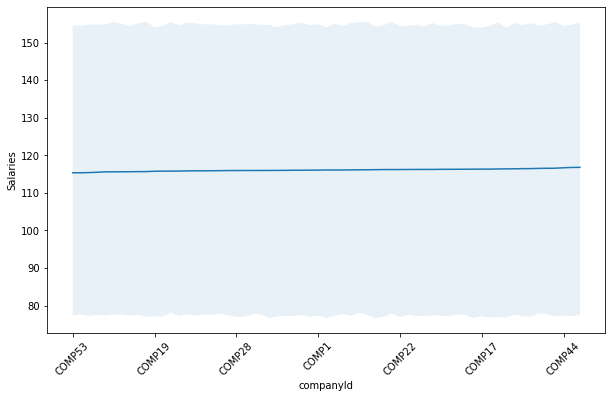

In [33]:
plotting_features(train_df, 'companyId')

**The salary is weakly assocciated with companies**

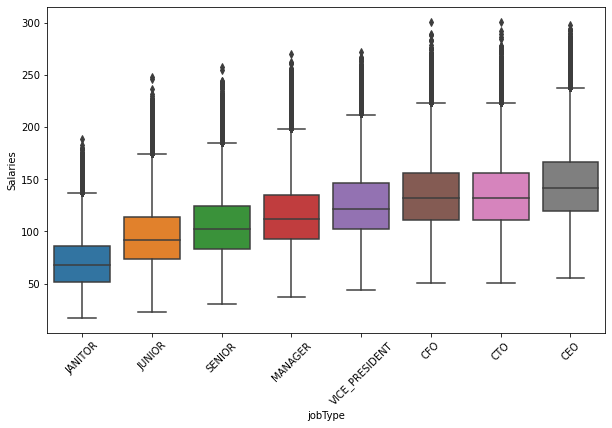

In [34]:
plotting_features(train_df, 'jobType')

**There is a clear positive correlation between job type and salary.**

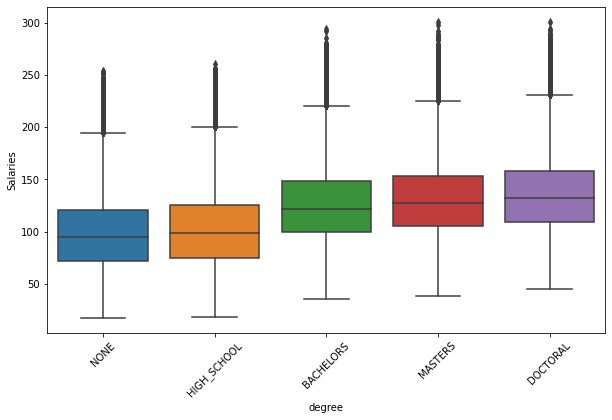

In [35]:
plotting_features(train_df, 'degree')

**More advanced degrees tend to correspond to higher salaries.**

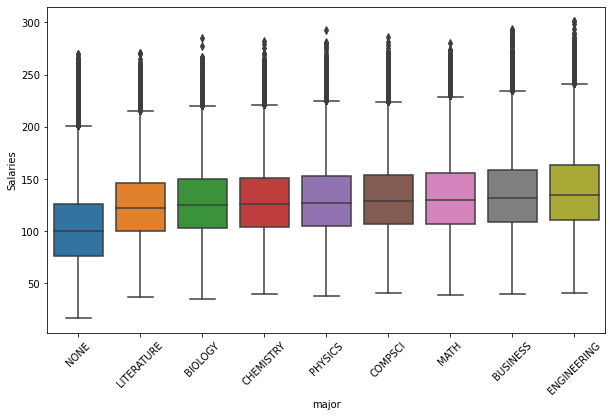

In [36]:
plotting_features(train_df, 'major')

**People with majors of engineering, business and math generally have higher salaries.**

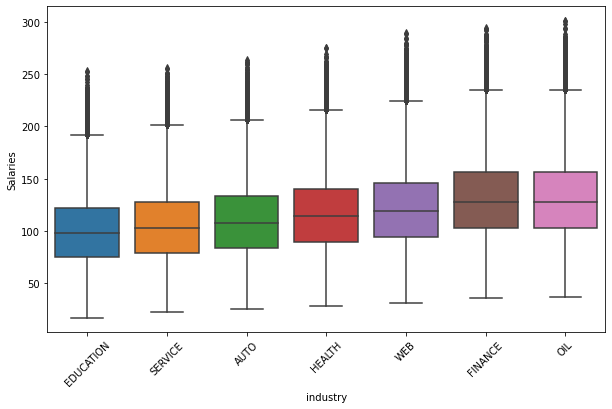

In [37]:
plotting_features(train_df, 'industry')

**As for industries, oil, finance and web industries generally pay better.**

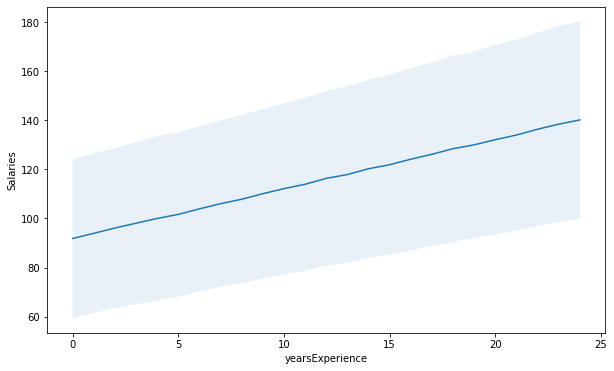

In [38]:
plotting_features(train_df, 'yearsExperience')

**In general, there is a clear correlation between salary and years of experience.**

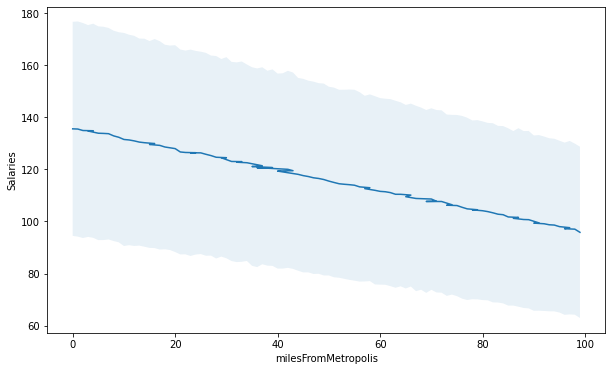

In [39]:
plotting_features(train_df, 'milesFromMetropolis')

In [40]:
def encode_label(df, col):
    #encode the categories using average salary for each category to replace label
    cat_dict ={}
    cats = df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = train_df[train_df[col] == cat]['salary'].mean()   
    df[col] = df[col].map(cat_dict)
    df[col] = df[col].astype('float')

In [41]:
for col in train_df.columns:
    if train_df[col].dtype.name == "category":
        encode_label(train_df, col)

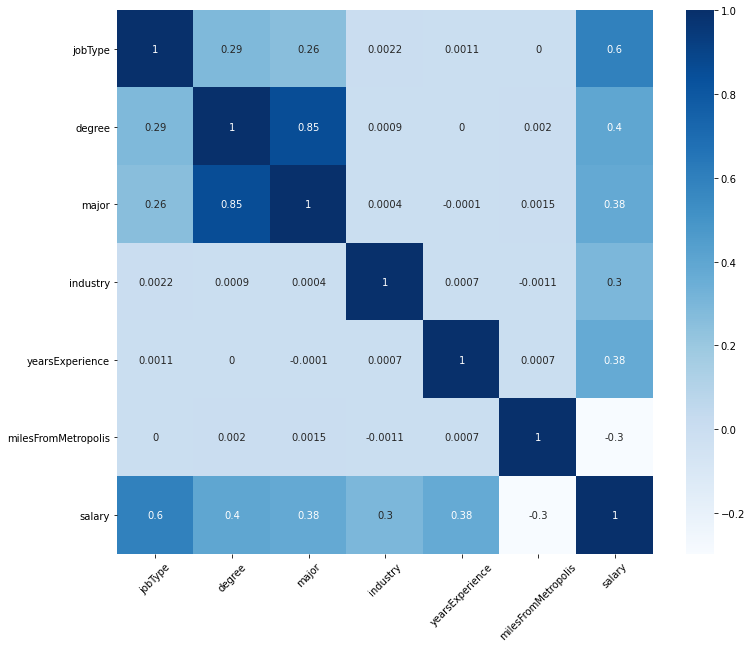

In [42]:
# Correlations between selected features and response
# jobId is discarded because it is unique for individual
fig = plt.figure(figsize=(12, 10))
features = ['companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']
sns.heatmap(train_df[features + ['salary']].corr().round(4), cmap='Blues', annot=True)
plt.xticks(rotation=45)
plt.show()

There is high positive correlation between degree and major. When we look at the salary feature `Target`, we can find good positive correlation with all features except  `milesFromMetropolis` feature which is a negative correlation and this matches our visualization above.